In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

데이터 분석을 위해서 데이터를 불러온다. => 불러온 데이터를 데이터 집합(set)이라고 한다.

In [3]:
# read_csv() 함수로 데이터 집합을 불러와 데이터프레임으로 리턴한다.
# read_csv() 함수는 ','로 데이터를 불러오기 때문에 탭으로 구분된 갭마인더 데이터는 sep='\t' 옵션을 사용해서 불러온다.
gapminder_df = pd.read_csv('./data/gapminder.tsv', sep='\t')
print(type(gapminder_df)) # <class 'pandas.core.frame.DataFrame'>
gapminder_df

<class 'pandas.core.frame.DataFrame'>


country continent  year  lifeExp       pop   gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333  779.445314
1     Afghanistan      Asia  1957   30.332   9240934  820.853030
2     Afghanistan      Asia  1962   31.997  10267083  853.100710
3     Afghanistan      Asia  1967   34.020  11537966  836.197138
4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...           ...       ...   ...      ...       ...         ...
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298

[1704 rows x 6 columns]

In [4]:
# head() 함수는 데이터프레임 앞쪽 데이터를 지정한 인수 개수만큼 출력된다. 기본 값은 5
gapminder_df.head(3)

country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710

In [5]:
# tail() 함수는 데이터프레임 앞쪽 데이터를 지정한 인수 개수만큼 출력된다. 기본 값은 5
gapminder_df.tail(3)

country continent  year  lifeExp       pop   gdpPercap
1701  Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702  Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298

In [6]:
# shape 속성은 데이터프레임에 저장한 데이터의 행과 열의 크기 정보를 저장하고 있다.
print(gapminder_df.shape[0]) # shape[0]은 데이터프레임의 행의 개수
print(gapminder_df.shape[1]) # shape[1]은 데이터프레임의 열의 개수
# column 속성은 데이터프레임의 열 이름을 저장하고 있다.
print(gapminder_df.columns)
# country: 국가, continent: 대륙, year: 연도, lifeExp: 평균 수명, pop: 인구수, gdpPercap: 인당 gdp

1704
6
Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


In [7]:
# dtypes 속성은 데이터프레임을 구성하고 있는 데이터의 자료형을 확인할 수 있다.
print(gapminder_df.dtypes)

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object


In [8]:
# info() 함수를 사용하면 dtypes를 사용한 것보다 다양한 정보를 확인할 수 있다.
print(gapminder_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


열 단위 데이터 추출하기

In [9]:
# 데이터프레임에서 추출하려면 대괄호와 열 이름을 사용하며 추출한 열은 변수에 저장해서 사용한다.
# 1개의 열만 추출하면 시리즈를 얻을 수 있다.
# country_df = gapminder_df['country'] # 데이터프레임에서 1개의 열만 얻어오려면 열 이름만 사용하면 된다.
# get() 메소드의 인수로 열 이름을 지정하면 1개의 열을 얻어올 수 있다.
# country_df = gapminder_df.get('country')
country_df = gapminder_df.country # 1개의 열만 얻어올 경우 데이터프레임 이름 뒤에 '.'을 찍고 열 이름을 적어주면 된다.
print(type(country_df)) # <class 'pandas.core.series.Series'>

<class 'pandas.core.series.Series'>


In [10]:
# 2개 이상의 열을 추출하면 데이터 프레임을 얻을 수 있다.
# 데이터프레임에서 1개의 열만 얻어오려면 [] 안에 열 이름만 적어주고, 2개 이상의 열을 얻어오려면 []안에 리스트 형태로 열 이름을 적는다.
subset_df = gapminder_df[['country', 'continent']]
print(subset_df)

          country continent
0     Afghanistan      Asia
1     Afghanistan      Asia
2     Afghanistan      Asia
3     Afghanistan      Asia
4     Afghanistan      Asia
...           ...       ...
1699     Zimbabwe    Africa
1700     Zimbabwe    Africa
1701     Zimbabwe    Africa
1702     Zimbabwe    Africa
1703     Zimbabwe    Africa

[1704 rows x 2 columns]


In [13]:
subset_df.head(3)
subset_df.tail(3)

country continent
1701  Zimbabwe    Africa
1702  Zimbabwe    Africa
1703  Zimbabwe    Africa

행 단위 데이터 추출하기
loc은 인덱스를 기준으로 행 단위 데이터를 추출하고 iloc는 행 번호를 기준으로 행 단위 데이터를 추출한다.

In [15]:
# 데이터프레임을 출력했을 때 맨 왼쪽에 보이는 숫자가 인덱스를 의미하고 행 번호는 데이터의 순서를 의미한다.
gapminder_df

country continent  year  lifeExp       pop   gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333  779.445314
1     Afghanistan      Asia  1957   30.332   9240934  820.853030
2     Afghanistan      Asia  1962   31.997  10267083  853.100710
3     Afghanistan      Asia  1967   34.020  11537966  836.197138
4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...           ...       ...   ...      ...       ...         ...
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298

[1704 rows x 6 columns]

In [16]:
# loc를 사용하면 0 ~ 1703 사이의 값을 이용해서 행 단위 데이터를 추출할 수 있고 인덱스가 아닌 -1이나 1704같이 인덱스 범위를 벗어나는 인덱스르 지정하면 에러가 발생한다.

In [21]:
print(gapminder_df.loc[0])
print('=' * 80)
print(gapminder_df.loc[1703])
print('=' * 80)
print(gapminder_df.iloc[-1])

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


In [23]:
# 마지막 데이터 추출하기
print(gapminder_df.tail(1))
gapminder_df_last = gapminder_df.tail(1)
print(gapminder_df_last)

       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298
       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


In [26]:
# 마지막 데이터 추출하기 => shape 사용
print(gapminder_df.shape)
print(gapminder_df.shape[0])
print(gapminder_df.loc[gapminder_df.shape[0] - 1])

(1704, 6)
1704
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


In [29]:
# 여러 인덱스의 데이터를 한꺼번에 추출하려면 리스트에 추출하려는 데이터의 인덱스를 담아서 loc에 넘겨주면 된다.
print(gapminder_df.loc[[0, 99, 999, 1703]])

          country continent  year  lifeExp       pop    gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333   779.445314
99     Bangladesh      Asia  1967   43.453  62821884   721.186086
999      Mongolia      Asia  1967   51.253   1149500  1226.041130
1703     Zimbabwe    Africa  2007   43.487  12311143   469.709298


In [33]:
# iloc를 사용하면 0 ~ 1703 사이의 값을 이용해 행 단위 데이터를 추출할 수 있고 1704와 같이 범위를 벗어나는 행 번호를 사용하면 에러가 발생한다.
# 음수를 지정하면 뒤부터 역순으로 행 단위 데이터를 추출할 수 있다.
print(gapminder_df.iloc[0])
print('=' * 80)
print(gapminder_df.iloc[1703])
print('=' * 80)
print(gapminder_df.iloc[-1])

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


In [35]:
# 여러 인덱스의 데이터를 한꺼번에 추출하려면 리스트에 추출하려는 데이터의 인덱스를 담아서 loc에 넘겨주면 된다.
print(gapminder_df.iloc[[0, 99, 999, 1703]])

          country continent  year  lifeExp       pop    gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333   779.445314
99     Bangladesh      Asia  1967   43.453  62821884   721.186086
999      Mongolia      Asia  1967   51.253   1149500  1226.041130
1703     Zimbabwe    Africa  2007   43.487  12311143   469.709298


loc와 iloc를 자유자재로 사용하려면 추출할 데이터의 행과 열을 지정하는 방법을 알아야 한다.
데이터프레임.loc[[행], [열]], 데이터프레임.iloc[[행], [열]] 방법을 사용해야 하며 슬라이싱이나 range() 함수를 사용하는 방법을 알아야 한다.

In [37]:
# 슬라이싱
# 모든 행(':')의 데이터에 대해 country, year, pop 열을 추출한다.
subset = gapminder_df.loc[:, ['country', 'year', 'pop']]
subset.head()

country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460

In [39]:
# loc는 열을 추출할 때 열 이름에 정수 리스트를 전달하면 에러가 발생한다.
# subset = gapminder_df.loc[:, [0, 2, 4]] # 에러

In [40]:
subset = gapminder_df.iloc[:, [0, 2, 4]]
subset.head()

country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460

In [43]:
# loc는 열을 추출할 때 열 이름에 문자열 리스트를 전달하면 에러가 발생한다.
# subset = gapminder_df.iloc[:, ['country', 'year', 'pop']] # 에러

range() 함수는 초기치부터 최종치를 넘어가지 않을 때까지 증가치만큼 증가하는 숫자 리스트를 만든다.
range([초기치, ]최종치[, 증가치])
초기치가 생략되면 0이 기본값으로, 증가치가 생략되면 1이 기본값으로 사용된다.
range(10)와 range(0, 10)와 range(0, 10, 1)는 같은 표현이다. => 실행 결과 숫자 리스트를 list()를 사용해서 리스트로 만들어야 확인할 수 있다.

In [ ]:
print(range(10))
print(list(range(10)))
print(list(range(0, 10)))
print(list(range(0, 10, 1)))

In [47]:
subset = gapminder_df.iloc[:, range(5)]
subset.head()

country continent  year  lifeExp       pop
0  Afghanistan      Asia  1952   28.801   8425333
1  Afghanistan      Asia  1957   30.332   9240934
2  Afghanistan      Asia  1962   31.997  10267083
3  Afghanistan      Asia  1967   34.020  11537966
4  Afghanistan      Asia  1972   36.088  13079460

In [48]:
subset = gapminder_df.iloc[:, range(3, 6)]
subset.head()

lifeExp       pop   gdpPercap
0   28.801   8425333  779.445314
1   30.332   9240934  820.853030
2   31.997  10267083  853.100710
3   34.020  11537966  836.197138
4   36.088  13079460  739.981106

In [49]:
subset = gapminder_df.iloc[:, range(0, 6, 2)]
subset.head()

country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460

range() 함수보다 슬라이싱을 사용하면 더 간편하게 사용할 수 있다.

In [50]:
subset = gapminder_df.iloc[:, 3:]
subset.head()

lifeExp       pop   gdpPercap
0   28.801   8425333  779.445314
1   30.332   9240934  820.853030
2   31.997  10267083  853.100710
3   34.020  11537966  836.197138
4   36.088  13079460  739.981106

In [ ]:
# [시작:끝] => [:], [시작:끝:증가] => [::]
subset = gapminder_df.iloc[:, ::2]
subset.head()

country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460

In [ ]:
# iloc로 열 리스트를 정수로 전달하는 방법이 간편해보일 수 있지만, 이렇게 작성한 코드는 나중에 어떤 데이터를 추출하기 위한 코드인지 파악을 못할 수 있다.
#   => 보통 loc로 열 리스트로 열 이름을 전달하는 방법을 많이 사용한다.

In [52]:
gapminder_df.iloc[:, [0, 3, 5]].head()

country  lifeExp   gdpPercap
0  Afghanistan   28.801  779.445314
1  Afghanistan   30.332  820.853030
2  Afghanistan   31.997  853.100710
3  Afghanistan   34.020  836.197138
4  Afghanistan   36.088  739.981106

In [54]:
gapminder_df.loc[:, ['country', 'lifeExp', 'gdpPercap']].head()

country  lifeExp   gdpPercap
0  Afghanistan   28.801  779.445314
1  Afghanistan   30.332  820.853030
2  Afghanistan   31.997  853.100710
3  Afghanistan   34.020  836.197138
4  Afghanistan   36.088  739.981106

기초적인 통계 계산하기

In [60]:
# groupby() 함수를 사용해 year 열로 그룹화하고 평균 수명 열(lifeExp)만 추출한 후 평균(mean()) 함수를 사용해 평균을 계산한다.
gapminder_df.groupby('year') # 그룹화
print(gapminder_df.groupby('year')['lifeExp']) # 그룹화된 데이터프레임에서 시리즈 추출
print(gapminder_df.groupby('year')['lifeExp'].mean())

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [59]:
print(gapminder_df.groupby(['continent', 'year'])['lifeExp'].mean())

continent  year
Africa     1952    39.135500
           1957    41.266346
           1962    43.319442
           1967    45.334538
           1972    47.450942
           1977    49.580423
           1982    51.592865
           1987    53.344788
           1992    53.629577
           1997    53.598269
           2002    53.325231
           2007    54.806038
Americas   1952    53.279840
           1957    55.960280
           1962    58.398760
           1967    60.410920
           1972    62.394920
           1977    64.391560
           1982    66.228840
           1987    68.090720
           1992    69.568360
           1997    71.150480
           2002    72.422040
           2007    73.608120
Asia       1952    46.314394
           1957    49.318544
           1962    51.563223
           1967    54.663640
           1972    57.319269
           1977    59.610556
           1982    62.617939
           1987    64.851182
           1992    66.537212
           1997    68.02051

그래프 그리기

In [61]:
import matplotlib.pyplot as plt

In [62]:
global_yearly_life = gapminder_df.groupby('year')['lifeExp'].mean()
global_yearly_life

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

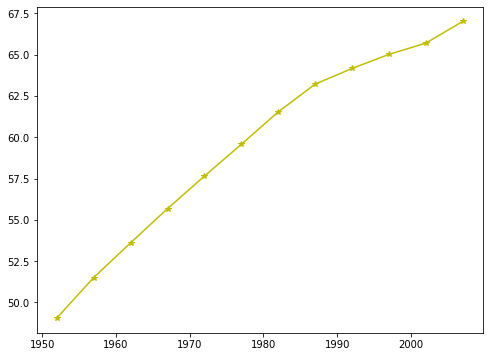

In [75]:
plt.figure(figsize=(8, 6))
# global_yearly_life.plot()
plt.plot(global_yearly_life, 'y', marker='*')
plt.show()